# **Rozkład $t$-Studenta** - $t(n)$
Zmienna losowa $X$ ma rozkład  $t$-Studenta o $n\in\mathbb{N_+}$ stopniach swobody, jeżeli jej gęstość $f$ jest postaci
$$
    f(x)=\frac{\Gamma(\frac{n+1}{2})}{\sqrt{n\pi}\Gamma(\frac{n}{2})}\Big(1+\frac{x^2}{n}\Big)^{-\frac{n+1}{2}} \quad \text{dla} \quad x\in\mathbb{R}.
$$

Wartość oczekiwana i wariancja, dla $n>2$, dane są wzorami
$$
    \mathbb{E}X = 0, \quad \text{Var}(X) = \frac{n}{n-2}.
$$

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.t.html#scipy.stats.t

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from scipy import stats

### Zadanie
1. Zdefiniuj zmienną losową dla rozkładu $t$-Studenta.
2. Narysuj gęstość.
3. Narysuj dystrybuantę.
4. Wyznacz podstawowe charakterystyki rozkładu: średnia, wariancja, odchylenie standardowe.
5. Wylosuj $n$ obserwacji z zdefiniowanego rozkładu.
6. Narysujmy histogram dla wylosowanej powyżej próbki.

In [3]:
df = 4
t4 = stats.t(df=df) # df = stopnie swobody
t4

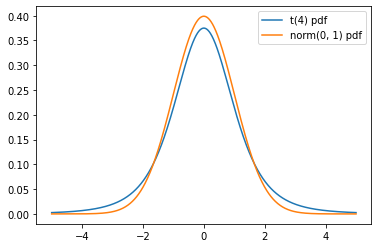

In [4]:
# Gęstość

x = np.linspace(-5, 5, 1000)
plt.plot(x, t4.pdf(x), label="t(4) pdf")
plt.plot(x, stats.norm().pdf(x), label="norm(0, 1) pdf")
plt.legend()
plt.show()

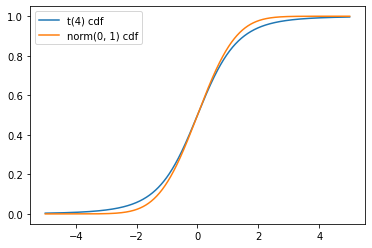

In [5]:
# Dystrybuanta

x = np.linspace(-5, 5, 1000)
plt.plot(x, t4.cdf(x), label="t(4) cdf")
plt.plot(x, stats.norm().cdf(x), label="norm(0, 1) cdf")
plt.legend()
plt.show()

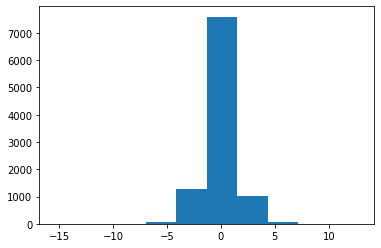

In [6]:
a = t4.rvs(size = 10000)
plt.hist(a)
plt.show()

### Zadanie
1. Narysuj na jednym wykresie gęstości dla rozkładu t-Studenta dla stopni swobody z zakresu od 1 do 20.
2. Dorysuj wykres gęstości rozkładu normalnego standardowego
3. Wyciągnij wnioski

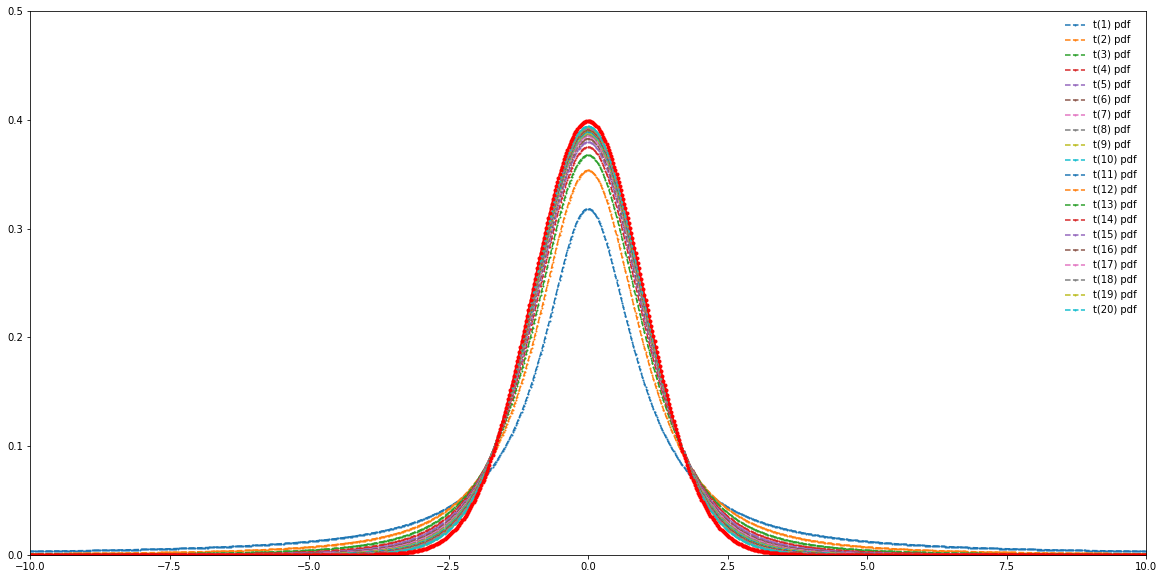

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(20, 10))
ax.set_xlim([-10, 10])
ax.set_ylim([0, .5])
x_value = np.linspace(-10, 10, 1000)

for i in np.arange(1, 21):
    t = stats.t(df=i)
    ax.plot(x_value, t.pdf(x_value), 'o--', ms=1, label='t({}) pdf'.format(i))
ax.legend(loc='best', frameon=False)

norm01 = stats.norm(loc=0, scale=1)
ax.plot(x_value, norm01.pdf(x_value), 'ro-', ms=3, label='norm(0,1) pdf'.format(i))
plt.show()

**Wniosek**: Wraz ze wzrostem stopni swobody rozkładu $t$-Studenta, rozkład zbiega do rozkładu normalnego standardowego.

### Zadanie - do domu
Sprawdzić empirycznie następujące własności:
1. Jeśli $X_1, \ldots, X_n$ będzie próbą z rozkładu normalnego $\mathcal{N}(\mu,\sigma)$ to zmienna $Y=\frac{\overline{X}-\mu}{S}\sqrt{n}$ pochodzi z rozkładu $t$-Studenta z $n-1$ stopniami swobody.

**Wskazkówka**: $S^2=\frac{1}{n-1}\sum_{i=1}^n(X_i-\overline{X})^2$.

(array([0.00086451, 0.        , 0.00086451, 0.00432254, 0.03976734,
        0.1746305 , 0.38816383, 0.19451417, 0.05273495, 0.00864507]),
 array([-7.60303878, -6.44631069, -5.2895826 , -4.13285451, -2.97612642,
        -1.81939833, -0.66267024,  0.49405785,  1.65078594,  2.80751403,
         3.96424212]),
 <BarContainer object of 10 artists>)

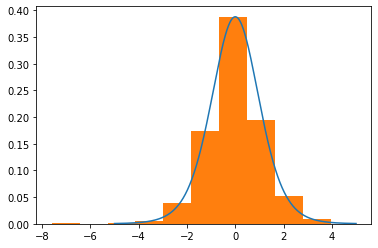

In [8]:
x = np.linspace(-5,5,1000)

n = 10
N = 1000

mu = 5
sigma = 3 

Yi = []

for i in range(N):
    X = stats.norm(mu, sigma).rvs(n)
    S = np.std(X, ddof=1)
    Y = (np.mean(X) - mu)/S * np.sqrt(n)
    Yi.append(Y)

t = stats.t(df=n-1)    

plt.plot(x, t.pdf(x))
plt.hist(Yi, density = True)




In [9]:
np.arange(5)

array([0, 1, 2, 3, 4])